# ICBHI dataset EDA

https://bhichallenge.med.auth.gr/ICBHI_2017_Challenge

Dataset consists of a total of 5.5 hours of recordings containing 6898 respiratory cycles, of which 1864 contain crackles, 886 contain wheezes, and 506 contain both crackles and wheezes, in 920 annotated audio samples from 126 subjects.

The cycles were annotated by respiratory experts as including crackles, wheezes, a combination of them, or no adventitious respiratory sounds. The recordings were collected using heterogeneous equipment and their duration ranged from 10s to 90s. The chest locations from which the recordings were acquired is also provided. Noise levels in some respiration cycles is high, which simulate real life conditions.

Each file name is divided into 5 elements, separated with underscores (_).

1. Patient number (101,102,...,226)

2. Recording index

3. Chest location 

      a. Trachea (Tc)

      b. Anterior left (Al)

      c. Anterior right (Ar)

      d. Posterior left (Pl)

      e. Posterior right (Pr)

      f. Lateral left (Ll)

      g. Lateral right (Lr)

4.    Acquisition mode 
     a. sequential/single channel (sc), 
     b. simultaneous/multichannel (mc)

5.    Recording equipment 
     a. AKG C417L Microphone (AKGC417L), 
     b. 3M Littmann Classic II SE Stethoscope (LittC2SE), 
     c. 3M Litmmann 3200 Electronic Stethoscope (Litt3200), 
     d.  WelchAllyn Meditron Master Elite Electronic Stethoscope (Meditron)

The annotation files comprise four columns:

Beginning of respiratory cycle(s)
End of respiratory cycle(s)
Presence/absence of crackles (presence=1, absence=0)
Presence/absence of wheezes (presence=1, absence=0)
The diagnosis for each subject can be found here and the distribution of the subjects between training/test set can be found here. The abbreviations used in the diagnosis file are:

COPD: Chronic Obstructive Pulmonary Disease
LRTI: Lower Respiratory Tract Infection
URTI: Upper Respiratory Tract Infection


In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt

## Target variable - diagnosis 

In [31]:
df_diagnosis = pd.DataFrame(columns=['patient number', 'diagnosis'])

with open('ICBHI_Challenge_diagnosis.txt', 'r') as file:
    for line in file.readlines():
        idx, diagnosis = line.split('\t')
        new_row = {'patient number': idx, 'diagnosis': diagnosis[:-2]}
        df_diagnosis.loc[len(df_diagnosis.index)] = new_row

df_diagnosis.sample(5)

,patient number,diagnosis
87,188,URT
28,129,URT
54,155,COP
50,151,COP
67,168,Bronchiectasi


In [32]:
df_diagnosis['diagnosis'].unique()

array(['URT', 'Health', 'Asthm', 'COP', 'LRT', 'Bronchiectasi',
       'Pneumoni', 'Bronchioliti'], dtype=object)

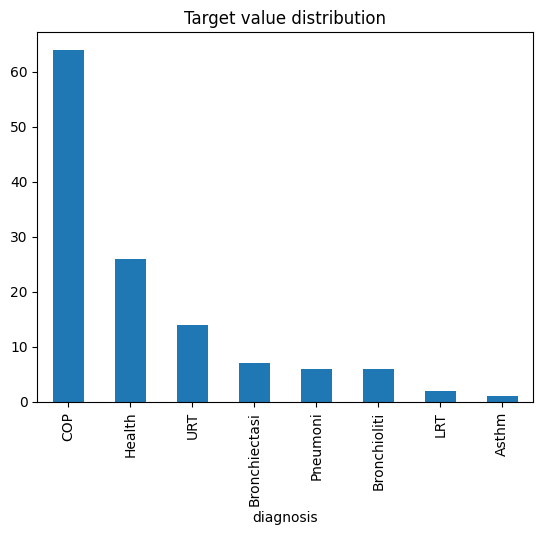

In [33]:
df_diagnosis['diagnosis'].value_counts().plot(kind="bar")
plt.title("Target value distribution")
plt.show()

## Data

In [34]:
columns_keys = [
    'patient number',
    'recording index',
    'chest location',
    'acquisition mode',
    'recording equipment'
]

files = pd.DataFrame(columns=columns_keys)

list_files = os.listdir("ICBHI_final_database")
for file in list_files:
    text, ext = file.split('.')
    if ext == 'wav':
        values = text.split('_')
        new_row = {key: value for key, value in zip(columns_keys, values)}
        files.loc[len(files.index)] = new_row    

files.sample(5)

,patient number,recording index,chest location,acquisition mode,recording equipment
187,204,7p5,Tc,mc,AKGC417L
427,222,1b1,Lr,sc,Meditron
314,178,2b2,Lr,mc,AKGC417L
375,160,1b2,Al,mc,AKGC417L
814,172,1b4,Lr,mc,AKGC417L


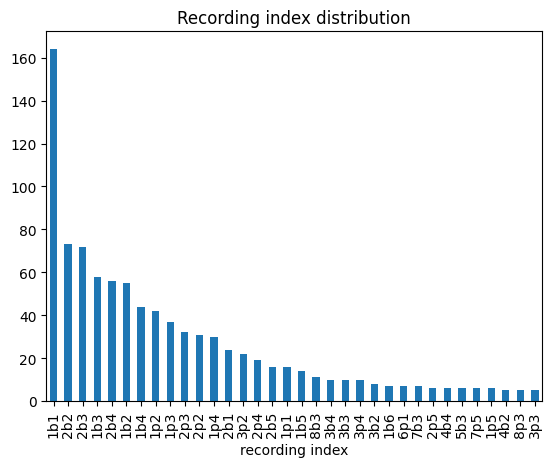

In [35]:
files['recording index'].value_counts().plot(kind="bar")
plt.title("Recording index distribution")
plt.show()

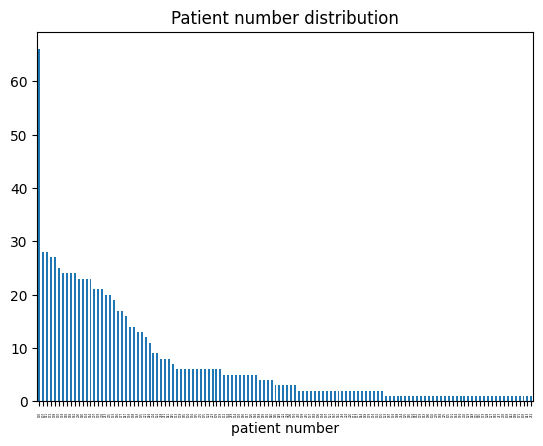

In [36]:
files['patient number'].value_counts().plot(kind="bar")
plt.xticks(size=2)
plt.title("Patient number distribution")
plt.show()

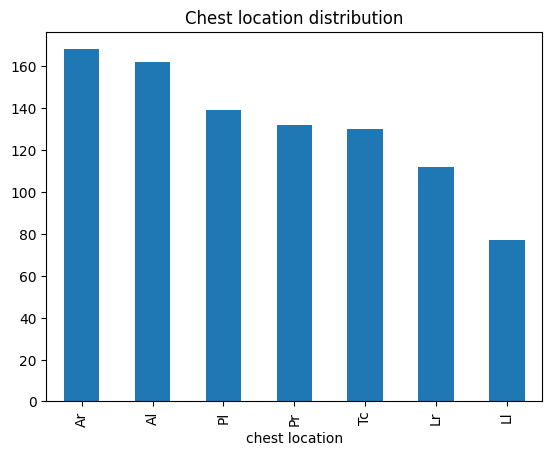

In [37]:
files['chest location'].value_counts().plot(kind="bar")
plt.title("Chest location distribution")
plt.show()

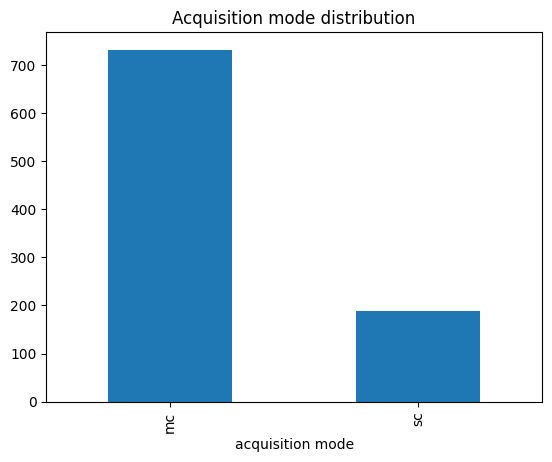

In [38]:
files['acquisition mode'].value_counts().plot(kind="bar")
plt.title("Acquisition mode distribution")
plt.show()

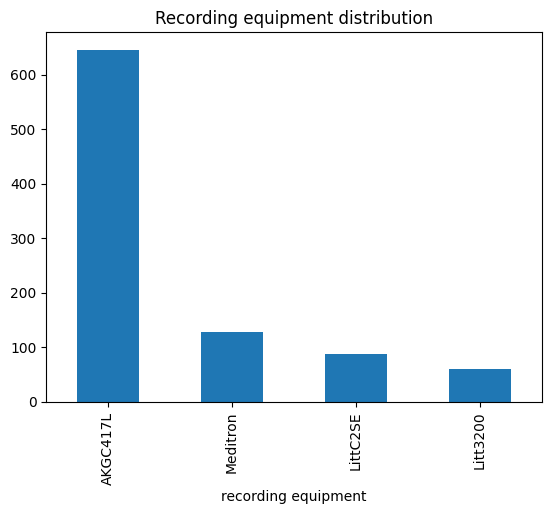

In [39]:
files['recording equipment'].value_counts().plot(kind="bar")
plt.title("Recording equipment distribution")
plt.show()

### Annotation files

In [40]:
columns = ['start', 'end', 'crackles', 'wheezes']

def read_annotation(file):
    ann = pd.DataFrame(columns=columns)
    with open(file, 'r') as file:
        for line in file.readlines():
            new_row = {key: value for key, value in zip(columns, line[:-1].split('\t'))}
            ann.loc[len(ann.index)] = new_row
    
    return ann
    

In [41]:
all_cycles = pd.DataFrame(columns=columns)
for annotation_file in os.listdir("ICBHI_final_database"):
    if annotation_file.endswith('.txt'):
        x = read_annotation(os.path.join("ICBHI_final_database", annotation_file))
        x['patient number'] = [annotation_file[:3] for _ in range(len(x.index))]
        all_cycles = pd.concat([all_cycles, x], axis=0)

all_cycles.sample(5)

,start,end,crackles,wheezes,patient number
2,10.292,14.232,1,0,174
0,1.185,5.268,1,0,186
3,13.614,17.671,0,1,160
3,11.027,15.351,0,0,174
3,13.252,16.427,0,0,178


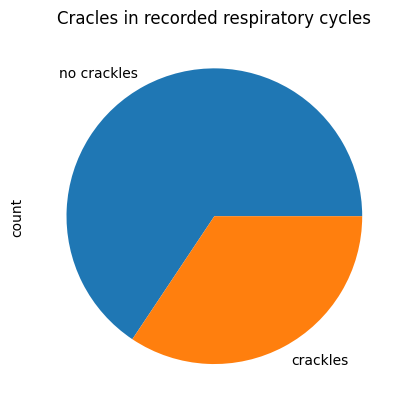

In [42]:
all_cycles['crackles'].value_counts().plot(kind="pie", labels=['no crackles', 'crackles'])
plt.title("Cracles in recorded respiratory cycles")
plt.show()

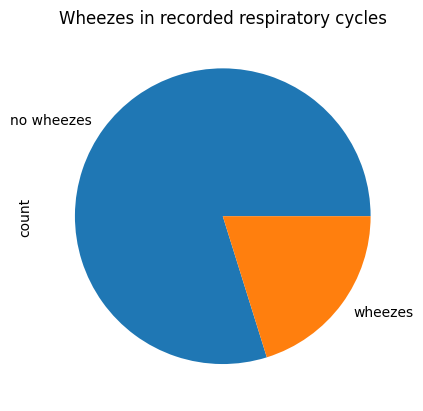

In [43]:
all_cycles['wheezes'].value_counts().plot(kind="pie", labels=['no wheezes', 'wheezes'])
plt.title("Wheezes in recorded respiratory cycles")
plt.show()

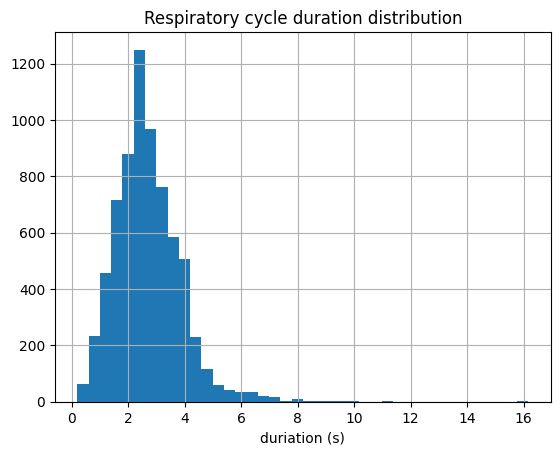

In [71]:
def time(row):
    try:
        return float(row['end']) - float(row['start'])
    except ValueError:
        return None

all_cycles['time'] = all_cycles.apply(time, axis=1)
all_cycles['time'] = all_cycles['time'].fillna(all_cycles['time'].mean())
all_cycles['time'].hist(bins=40)
plt.title("Respiratory cycle duration distribution")
plt.xlabel("duriation (s)")
plt.show()

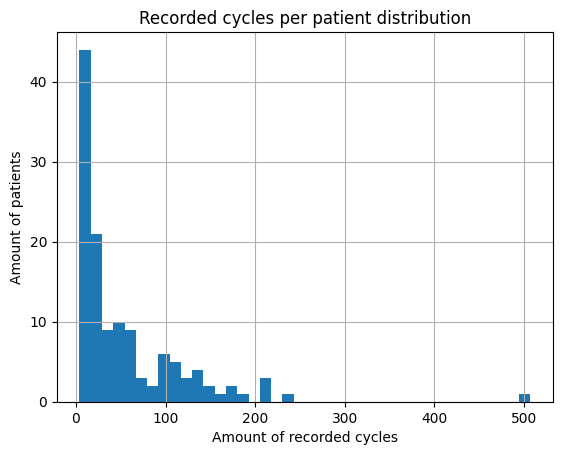

In [72]:
all_cycles.groupby('patient number').size().hist(bins=40)
plt.title("Recorded cycles per patient distribution")
plt.ylabel("Amount of patients")
plt.xlabel("Amount of recorded cycles")
plt.show()

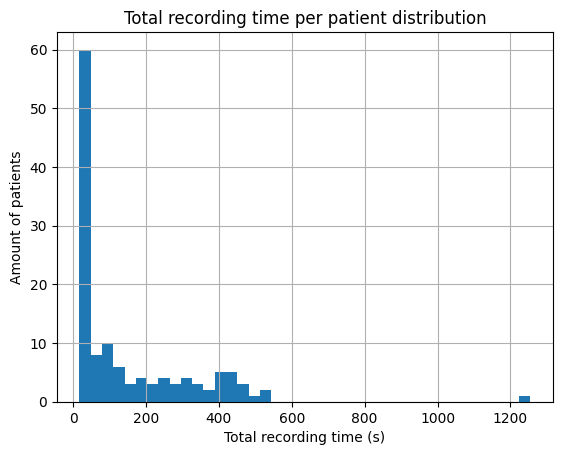

In [73]:
all_cycles.groupby('patient number')['time'].sum().hist(bins=40)
plt.title("Total recording time per patient distribution")
plt.ylabel("Amount of patients")
plt.xlabel("Total recording time (s)")
plt.show()